In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Regression with SKLearn


In [13]:
np.random.seed(0)
m=100
X=np.linspace(0,10,m).reshape(m,1)
y=X**2+np.random.randn(m,1)

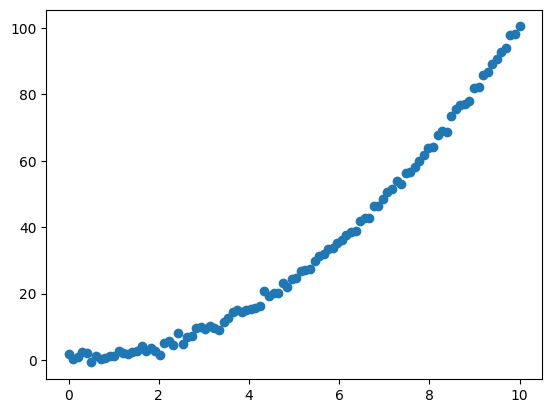

In [14]:
plt.scatter(X,y)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns

C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


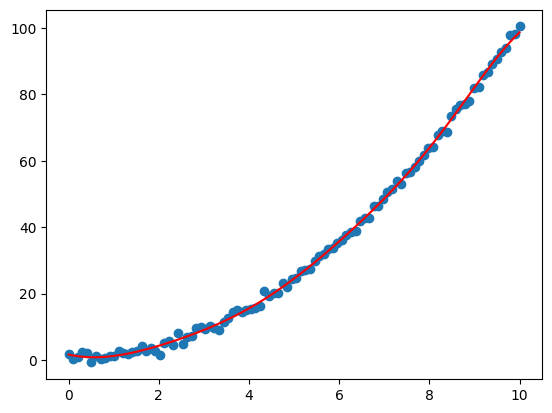

In [16]:
model=SVR(C=100)
model.fit(X,y)
model.score(X,y)
predictions=model.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions,c='r')

In [17]:
model.score(X,y)

0.9989763625652847

Classification
Titanic

In [26]:
titanic=sns.load_dataset('titanic')
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic=titanic[['survived','pclass','sex','age']]
titanic.dropna(axis=0,inplace=True)
titanic['sex'].replace(['male','female'],[0,1],inplace=True)
titanic.head()

C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_24124\3299924775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(axis=0,inplace=True)
C:\Users\azizm.AZIZ-PC\AppData\Local\Temp\ipykernel_24124\3299924775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['sex'].replace(['male','female'],[0,1],inplace=True)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
y=titanic['survived']
X=titanic.drop('survived',axis=1)

In [63]:
def best_n_neighbors(X,y):
    best_n=-1
    best_score=0
    for n in range(1,11):
        model=KNeighborsClassifier(n_neighbors=n)
        model.fit(X,y)
        if model.score(X,y)>best_score:
            best_n=n
            best_score=model.score(X,y)
    return best_n


In [69]:
best_n=best_n_neighbors(X,y)
best_n

1

In [70]:
model=KNeighborsClassifier(n_neighbors=best_n)

In [71]:
model.fit(X,y)
model.score(X,y)

0.8739495798319328

In [75]:
def survive(model,pclass=3,sex=0,age=21):
    x=np.array([pclass,sex,age]).reshape(1,3)
    result=model.predict(x)[0]
    if result==0:
        print('ilmar7oum')
    else:
        print('salikthaa')
    proba=model.predict_proba(x)[0]
    print('kan 3andik '+str(proba[1])+'% mach tislik w '+str(proba[0])+'% mach titwafa')

In [80]:
survive(model,pclass=1,sex=0,age=21)

ilmar7oum
kan 3andik 0.0% mach tislik w 1.0% mach titwafa


C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\azizm.AZIZ-PC\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Iris Flower

In [81]:
from sklearn.datasets import load_iris

(150, 4)


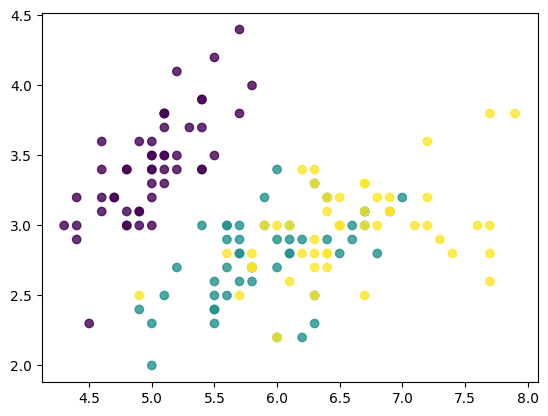

In [84]:
iris=load_iris()
X=iris.data
y=iris.target

print(X.shape)
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)

In [85]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
print('Train set:',X_train.shape)
print('Test set:',X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

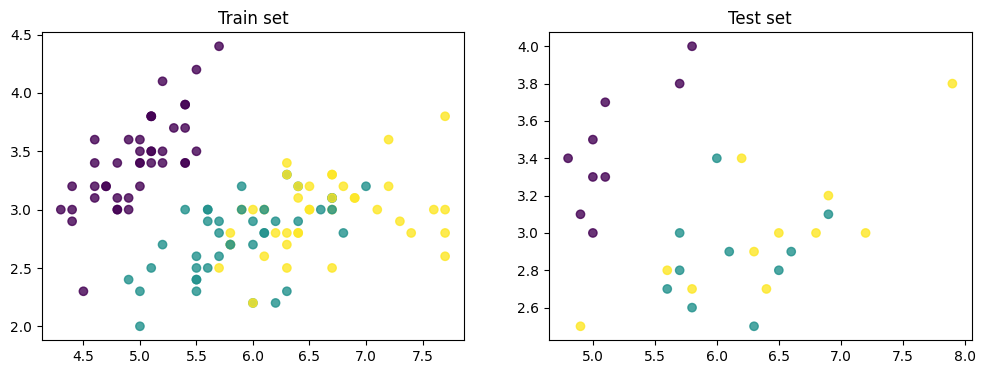

In [89]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('Test set')

In [94]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
print('Train score :',model.score(X_train,y_train))
print('Test score :',model.score(X_test,y_test))

Train score : 1.0
Test score : 0.9333333333333333


validation

validation curves

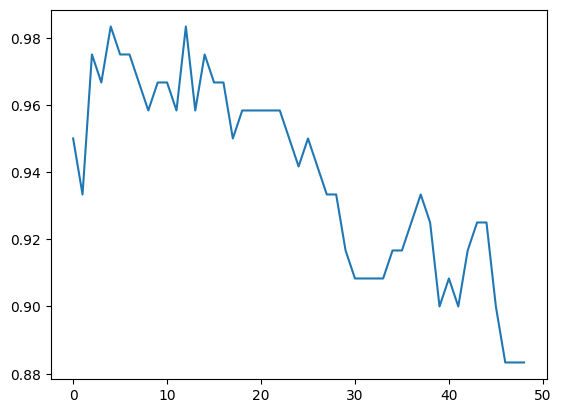

In [95]:
from sklearn.model_selection import cross_val_score
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
    val_score.append(score)
plt.plot(val_score)

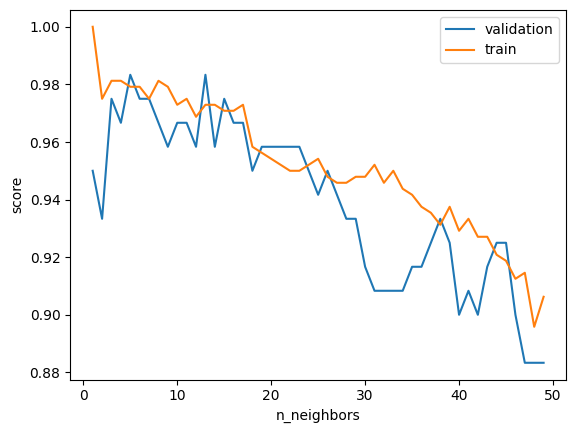

In [103]:
from sklearn.model_selection import validation_curve
model=KNeighborsClassifier()
k=np.arange(1,50)
train_score,val_score=validation_curve(model,X_train,y_train,param_name='n_neighbors',param_range=k,cv=5)
plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='train')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

Grid SearchCV
search for the best params

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid={
    'n_neighbors':np.arange(1,20),
    'metric':['euclidean','manhattan']
}

grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [106]:
grid.best_score_

0.9833333333333334

In [107]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [108]:
model=grid.best_estimator_

In [109]:
model.score(X_test,y_test)

0.9333333333333333

In [110]:
from sklearn.metrics import confusion_matrix


see where the problems are in classification

In [111]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 10]], dtype=int64)

Learning curve

In [112]:
from sklearn.model_selection import learning_curve

[19 38 57 76 96]


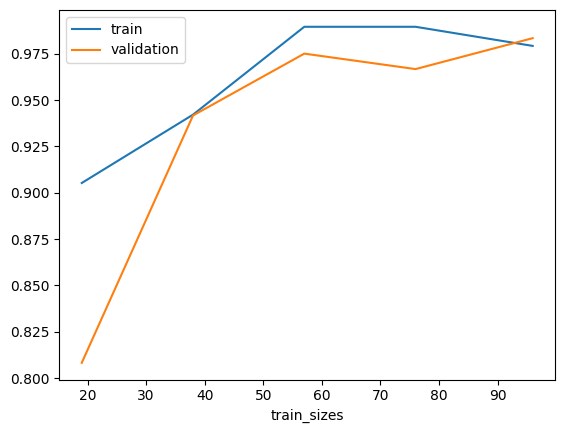

In [114]:
N,train_score,val_score =learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.2,1.0,5),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()